Visualization (data snapshot, improvement trend) for proposal

In [1]:
# Combine all plots into one reusable script

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import numpy as np

## Load the dataset
# Assuming the dataset is in CSV format and has been preprocessed
df = pd.read_csv("data/filtered_model_data.csv")

# Convert start_time_min to datetime
df['start_time_min'] = pd.to_datetime(df['start_time'], format='%Y-%m-%d %H:%M:%S')

In [2]:
df = df.drop_duplicates(subset=['id'])

In [3]:
df.nunique()

id                5839764
patient_id           4399
start_time        5622203
task_type_id          172
task_level             12
domain_ids             27
domain_scores      174673
start_time_min    5622203
dtype: int64

In [4]:
df

,id,patient_id,start_time,task_type_id,task_level,domain_ids,domain_scores,start_time_min
0,6334548,97021,2017-03-13 00:49:21,79,3,9,0.6000,2017-03-13 00:49:21
1,8391327,134153,2017-09-21 17:46:51,37,1,"1,10,11","0.3430,0.3640,0.7600",2017-09-21 17:46:51
2,8814541,139776,2017-10-25 21:53:53,76,1,"6,8","0.7500,0.5000",2017-10-25 21:53:53
3,8970881,119855,2017-11-07 20:06:06,24,4,12,0.5640,2017-11-07 20:06:06
4,9156751,144485,2017-11-22 15:01:40,10,4,"6,7","0.4000,0.4000",2017-11-22 15:01:40
...,...,...,...,...,...,...,...,...
5839759,41974214,35004,2023-06-22 03:09:03,235,6,14,0.8670,2023-06-22 03:09:03
5839760,41976112,54405,2023-06-22 03:15:19,136,6,13,0.5410,2023-06-22 03:15:19
5839761,41976113,54405,2023-06-22 03:16:52,13,2,2,0.3800,2023-06-22 03:16:52
5839762,41976114,54405,2023-06-22 03:20:17,26,2,5,0.2580,2023-06-22 03:20:17


In [5]:
df.nunique()

id                5839764
patient_id           4399
start_time        5622203
task_type_id          172
task_level             12
domain_ids             27
domain_scores      174673
start_time_min    5622203
dtype: int64

21 41669 1327.5208001818596 539.0


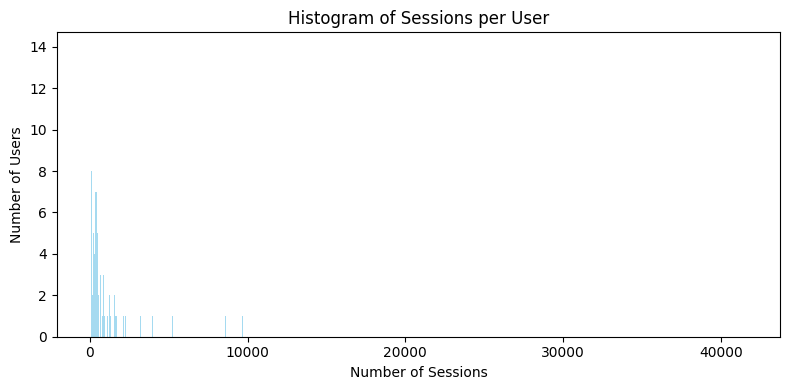

1 148017 82250.19718309859 75178.0


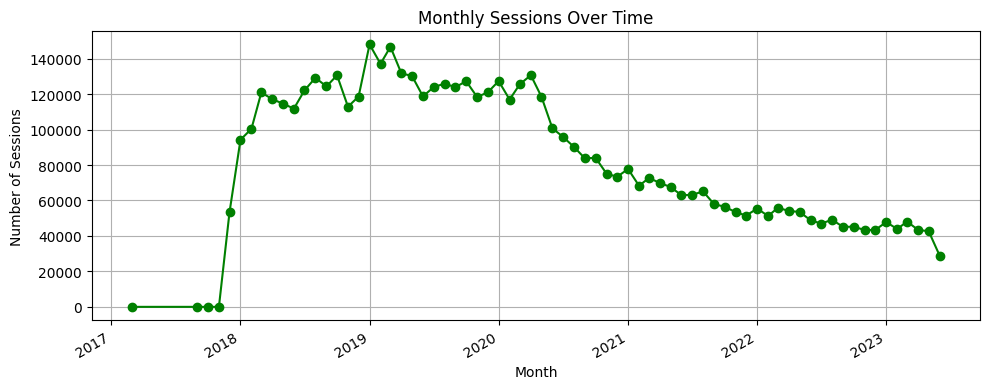

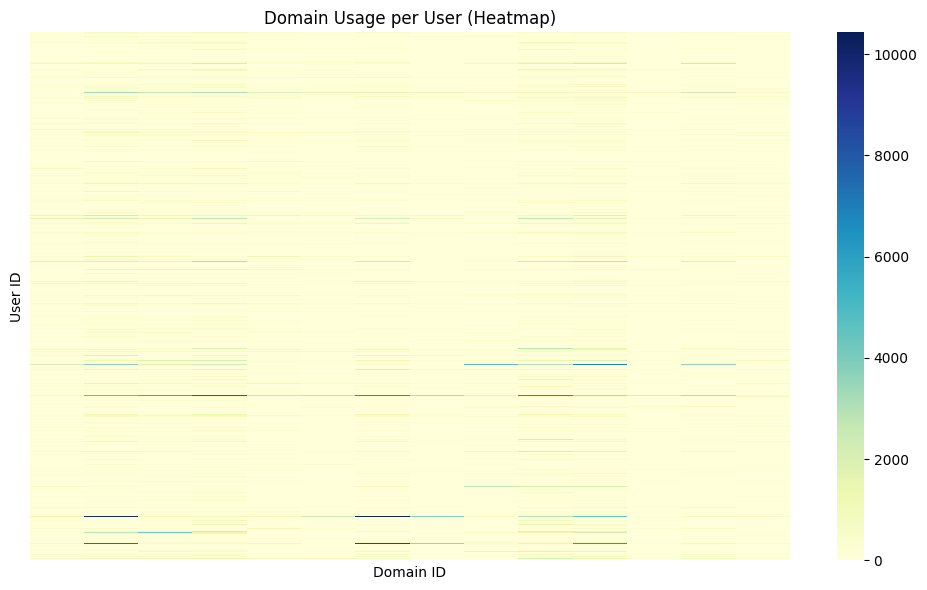

In [6]:
# ----------------------------
# 1. Histogram of sessions per user
# ----------------------------
def plot_session_histogram(df):
    session_counts = df['patient_id'].value_counts()
    print(min(session_counts), max(session_counts), session_counts.mean(), session_counts.median())
    plt.figure(figsize=(8, 4))
    sns.histplot(session_counts, bins=range(1, session_counts.max()+2), kde=False, color='skyblue')
    plt.title('Histogram of Sessions per User')
    plt.xlabel('Number of Sessions')
    plt.ylabel('Number of Users')
    plt.tight_layout()
    plt.show()

# ----------------------------
# 2. Line plot of monthly sessions
# ----------------------------
def plot_monthly_sessions(df):
    df['month'] = df['start_time_min'].dt.to_period('M').dt.to_timestamp()
    monthly_sessions = df.groupby('month').size()
    print(min(monthly_sessions), max(monthly_sessions), monthly_sessions.mean(), monthly_sessions.median())
    plt.figure(figsize=(10, 4))
    monthly_sessions.plot(marker='o', color='green')
    plt.title('Monthly Sessions Over Time')
    plt.xlabel('Month')
    plt.ylabel('Number of Sessions')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ----------------------------
# 3. Heatmap of domain usage per user
# ----------------------------
def plot_domain_heatmap(df):
    # Generate heatmap matrix
    domain_user_matrix = defaultdict(lambda: defaultdict(int))
    for _, row in df.iterrows():
        domains = row['domain_ids'].split(',')
        user = row['patient_id']
        for domain in domains:
            domain_user_matrix[str(user)][domain.strip()] += 1

    # Convert to DataFrame
    heatmap_df = pd.DataFrame(domain_user_matrix).fillna(0).astype(int).T.sort_index()

    # Plot heatmap without axis labels
    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_df, cmap='YlGnBu', cbar=True, xticklabels=False, yticklabels=False)
    plt.title('Domain Usage per User (Heatmap)')
    plt.xlabel('Domain ID')
    plt.ylabel('User ID')
    plt.tight_layout()
    plt.show()

# Call all plots
plot_session_histogram(df)
plot_monthly_sessions(df)
plot_domain_heatmap(df)


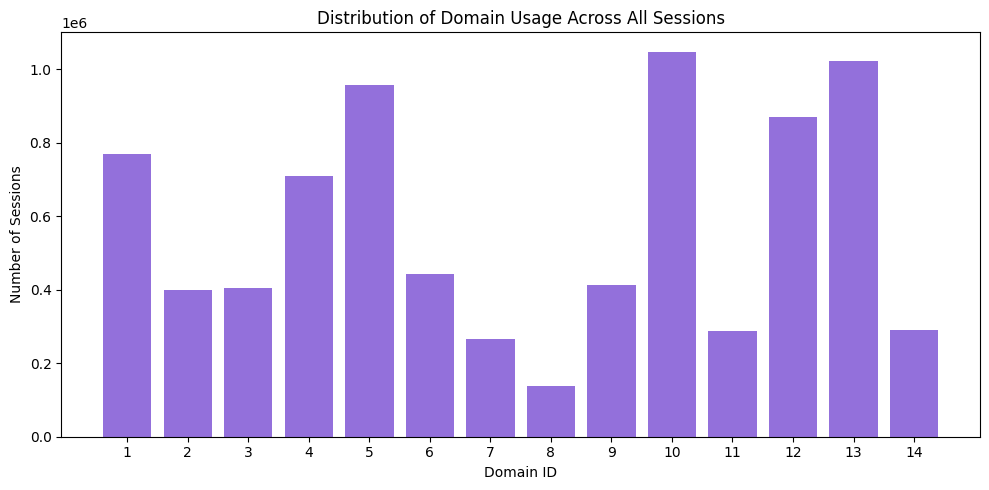

In [7]:
from collections import Counter

def plot_domain_distribution(df):
    """
    Plots a distribution of domain usage across all sessions.

    Args:
        df (pd.DataFrame): DataFrame containing at least a 'domain_ids' column
                           with comma-separated domain identifiers.
    """
    # Handle missing or malformed values
    df = df.copy()
    df['domain_ids'] = df['domain_ids'].fillna('')

    # Parse and flatten domain ID lists
    all_domains = [domain.strip() for sublist in df['domain_ids'].str.split(',') for domain in sublist if domain.strip()]
    domain_counts = Counter(all_domains)

    # Prepare data for plotting
    domains, counts = zip(*sorted(domain_counts.items(), key=lambda x: int(x[0])))

    # Plot
    plt.figure(figsize=(10, 5))
    plt.bar(domains, counts, color='mediumpurple')
    plt.xlabel('Domain ID')
    plt.ylabel('Number of Sessions')
    plt.title('Distribution of Domain Usage Across All Sessions')
    plt.tight_layout()
    plt.show()

# Example usage:
plot_domain_distribution(df)

In [12]:
import random

# Assuming your DataFrame is named df and contains a 'patient_id' column
def get_random_patient_id(df):
    unique_ids = df['patient_id'].unique()
    return random.choice(unique_ids)

# Example usage
random_patient = get_random_patient_id(df)

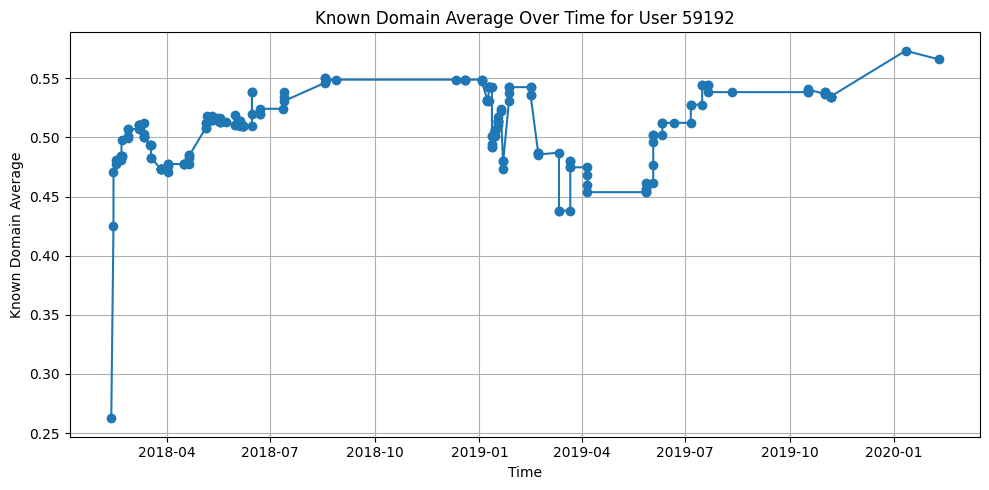

Bad pipe message: %s [b'!H:3\xcb~\xd1F']
Bad pipe message: %s [b'\t\xe0\xa8p~yt\x97\x00\x01|\x00\x00\x00\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00\x07\x00\x08\x00\t\x00\n\x00\x0b\x00\x0c\x00\r\x00\x0e\x00\x0f\x00\x10\x00\x11\x00\x12\x00\x13\x00\x14\x00\x15\x00\x16\x00\x17\x00\x18\x00\x19\x00\x1a\x00\x1b\x00/\x000\x001\x002\x003\x004\x005\x006\x007\x008\x009\x00:\x00;\x00<\x00=\x00>\x00?\x00@\x00A\x00B\x00C\x00D\x00E\x00F\x00g\x00h\x00i\x00j\x00k\x00l\x00m\x00\x84\x00\x85\x00\x86\x00\x87\x00\x88\x00\x89\x00\x96\x00\x97\x00\x98\x00\x99\x00\x9a\x00\x9b\x00\x9c\x00\x9d\x00\x9e\x00\x9f\x00\xa0\x00\xa1\x00\xa2\x00\xa3\x00\xa4\x00\xa5\x00\xa6\x00\xa7\x00\xba\x00\xbb\x00\xbc\x00\xbd\x00\xbe\x00\xbf\x00\xc0\x00\xc1\x00\xc2\x00\xc3\x00', b"\xc5\x13\x01\x13\x02\x13\x03\x13\x04\x13\x05\xc0\x01\xc0\x02\xc0\x03\xc0\x04\xc0\x05\xc0\x06\xc0\x07\xc0\x08\xc0\t\xc0\n\xc0\x0b\xc0\x0c\xc0\r\xc0\x0e\xc0\x0f\xc0\x10\xc0\x11\xc0\x12\xc0\x13\xc0\x14\xc0\x15\xc0\x16\xc0\x17\xc0\x18\xc0\x19\xc0#\xc0$\xc0%\

In [14]:
def plot_known_domain_average(df, patient_id):
    """
    Plot the known domain average over time for a specific patient.
    
    Parameters:
    - df: DataFrame with columns ['patient_id', 'domain_ids', 'domain_scores', 'start_time_min']
    - patient_id: ID of the patient to plot
    """
    # Filter and sort by time
    patient_df = df[df['patient_id'] == patient_id].copy()
    patient_df.sort_values('start_time_min', inplace=True)

    # Track known scores and compute averages
    known_scores = {}
    averages = []
    timestamps = []

    for _, row in patient_df.iterrows():
        domain_ids = row['domain_ids'].split(',')
        domain_scores = row['domain_scores'].split(',')

        for dom, score in zip(domain_ids, domain_scores):
            dom = dom.strip()
            try:
                score = float(score.strip())
                known_scores[dom] = score
            except ValueError:
                continue

        if known_scores:
            avg = sum(known_scores.values()) / len(known_scores)
            averages.append(avg)
            timestamps.append(row['start_time_min'])

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(timestamps, averages, marker='o', linestyle='-')
    plt.title(f'Known Domain Average Over Time for User {patient_id}')
    plt.xlabel('Time')
    plt.ylabel('Known Domain Average')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage with the simulated data
plot_known_domain_average(df, patient_id=random_patient)

In [ ]:
df = pd.read_csv("data/domain_score_CT.csv")

In [18]:
df.head()

,Unnamed: 0,id,type,schedule_id,patient_id,clinician_id,parent_id,start_time,end_time,duration,...,skipped_response_count,accuracy,latency,end_reason,parameters_json,aggregate_response_accuracy,score,max_score,domain_ids,domain_scores
0,0,531125,SCHEDULED,25729,9228,NaN,531124,2017-12-12 15:18:30,2017-12-12 15:20:24,123.0,...,0,0.85,24.64,tasks completed,"{""level"":""1"",""sessionType"":""SCHEDULED""}",NaN,NaN,NaN,1,0.4000
1,1,531126,SCHEDULED,25729,9228,NaN,531124,2017-12-12 15:22:07,2017-12-12 15:40:19,207.0,...,0,1.00,41.50,tasks completed,"{""level"":""3"",""sessionType"":""SCHEDULED""}",NaN,NaN,NaN,2,0.5100
2,2,531127,SCHEDULED,25729,9228,NaN,531124,2017-12-12 15:40:42,2017-12-12 15:42:47,128.0,...,0,0.95,25.76,tasks completed,"{""level"":""10"",""sessionType"":""SCHEDULED""}",NaN,NaN,NaN,"3,13","1.0000,0.5700"
3,3,531128,SCHEDULED,25729,9228,NaN,531124,2017-12-12 15:43:17,2017-12-12 15:43:54,62.0,...,0,0.87,20.75,tasks completed,"{""level"":""1"",""sessionType"":""SCHEDULED""}",NaN,NaN,NaN,12,0.3860
4,4,531130,SCHEDULED,25729,9228,NaN,531124,2017-12-12 15:46:37,2017-12-12 15:48:39,179.0,...,0,1.00,35.83,tasks completed,"{""level"":""3"",""sessionType"":""SCHEDULED""}",NaN,NaN,NaN,14,0.3070


In [17]:
df.nunique()

Unnamed: 0                     5758404
id                             5758404
type                                 1
schedule_id                     552718
patient_id                       83472
clinician_id                         0
parent_id                       863625
start_time                     5390952
end_time                       5511305
duration                          8102
is_baseline                          1
task_type_id                       175
task_level                          12
total_task_count                    86
completed_task_count                88
skipped_response_count              24
accuracy                          1012
latency                          76888
end_reason                          14
parameters_json                 197403
aggregate_response_accuracy          0
score                                0
max_score                            0
domain_ids                          27
domain_scores                   178882
dtype: int64